In [474]:
from intern.remote.boss import BossRemote
from intern.resource.boss.resource import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

rmt = BossRemote()

In [475]:
coll_list = rmt.list_collections()
#print(type(coll_list[0]))
print("Collections: {}".format(coll_list))

Collections: [u'kharris15', u'ailey-dev', u'weiler14', u'ndreg', u'kristina15', u'bigbrain', u'collman', u'ara_2016', u's3617_to_ara_coll', u'wanner16', u'dyer', u'takemura', u'cardona', u'kasthuri', u'control9_to_ara', u'ZBrain', u'kutten', u'cell_detection', u'bloss', u'lee', u'bhatia', u'bock', u'registrations', u'bias_corrections', u'ABagemouse']


In [476]:
exp_list = rmt.list_experiments('ailey-dev')
print(exp_list)
# print(type(exp_list[0]))
#print(rmt.list_metadata('ailey-dev'))

[u'170119_Insula_grCOMET_244_08-39-35', u'170325_Insula_HSV-YFP_rCOMET_Ant_486_10-37-14', u'170726_Insula-vCapture-Atenolol2_00-56-01', u'170726_Insula-vCapture-Atenolol2_00-56-01_res2_anno', u'170728_Insula-vCapture-Iso1_12-42-27', u'aileydev_Th1eYFP_control_res2_anno', u'ara3_to_s3617_res6', u'daniel_test_112', u'DRN-BLA_2378', u'DRN-BLA_2378_2p_glycerol', u'DRN-BLA_2987_20170926', u'DRN-VTA_2376', u'DRN-VTA_2377', u'DRN-VTA_NoTag_20170919', u'Insula_Atenolol-1_171204_new', u'Insula_Control-2_171206', u'MHb_ChAT_396', u's3617', u's3617_glycerol', u's3617_glycerol_2p', u'sert-cre_2497_20160817', u'Th1eYFP_control_10_to_ara3_res2', u'Thy1eYFP_Control_10_upload20170916', u'Thy1eYFP_Control_11_upload20170915', u'Thy1eYFP_Control_12_upload20170919', u'Thy1eYFP_Control_9_upload20170919']


In [477]:
chan_list = rmt.list_channels('ailey-dev', 'Insula_Atenolol-1_171204_new')
print("Channels in Collection - ailey-dev and experiment Insula_Atenolol-1_171204_new: {}".format(chan_list))

Channels in Collection - ailey-dev and experiment Insula_Atenolol-1_171204_new: [u'Ch0', u'Ch1', u'Ch2']


In [478]:
annot = rmt.get_channel(chan_name='Ch0', coll_name='ailey-dev', exp_name='Insula_Atenolol-1_171204_new')
#print(type(annot))

In [479]:
#cof = np.array(rmt.list_coordinate_frames())
#print(cof.shape)
#print(cof[-1])


In [480]:
tmp = ExperimentResource(collection_name='ailey-dev', name='Insula_Atenolol-1_171204_new')
exp = rmt.get_project(tmp)
#print(experi.coord_frame)

In [481]:
# get coordinate frame
tmp = CoordinateFrameResource(name=exp.coord_frame)
coor = rmt.get_project(tmp)
print(coor.x_stop, coor.y_stop, coor.z_stop)

(2160, 2560, 1280)


In [482]:
x_rng = [coor.x_start , coor.x_stop]
y_rng = [coor.y_start , coor.y_stop]
z_rng = [550 , 570]

(20, 2560, 2160)


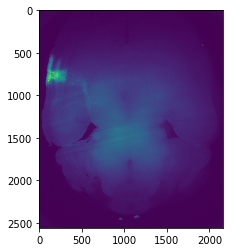

In [483]:
data_cutout = rmt.get_cutout(annot , 0 , x_rng , y_rng , z_rng)
print(data_cutout.shape)

fig = plt.figure()

im = plt.imshow(data_cutout[0,:,:],animated=True)



def animate(i):
    
    im.set_data(data_cutout[i,:,:])
    
    return im

anim = animation.FuncAnimation(fig, animate, frames = np.arange(0,data_cutout.shape[0]), interval = 100)
HTML(anim.to_jshtml())

In [ ]:
print(rmt.list_metadata(annot))

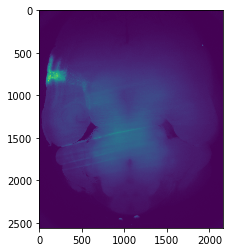

In [484]:
plt.ion()
imobj = plt.imshow(data_cutout[0,:,:] , animated=True)

for idx in range(1,data_cutout.shape[0]):
    tmp = data_cutout[idx,:,:]
    imobj.set_data(tmp)
    
    plt.show()
   
    plt.pause(0.3)
    
    

In [ ]:
im = plt.imshow(data_cutout[0,:,:])
im.set_data(data_cutout[5,:,:])

In [ ]:
import matplotlib
print(matplotlib.animation.writers.list())
